This notebook is a simple experiment with git-cloning the DeepWeeds repo and run the `deepweeds.py` script to measure inference times.

In [6]:
!git clone https://github.com/AlexOlsen/DeepWeeds.git

Cloning into 'DeepWeeds'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33
Unpacking objects: 100% (33/33), done.


In [9]:
%cd DeepWeeds

/storage/deep-weeds-experiments/DeepWeeds


In [ ]:
!python3 deepweeds.py inference --model models/resnet.hdf5

Using TensorFlow backend.
Finished downloading images.
Unzipping ./images/images.zip
Finished unzipping images.
2019-11-04 19:05:57.258291: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-11-04 19:05:57.278429: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1006] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-11-04 19:05:57.279237: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Quadro M4000 major: 5 minor: 2 memoryClockRate(GHz): 0.7725
pciBusID: 0000:00:05.0
2019-11-04 19:05:57.279545: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2019-11-04 19:05:57.281194: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2019-11-04 19:05:57.282403:

In [14]:
!tree outputs

outputs
└── 20191104-190645
    └── tf_inference_times.csv

1 directory, 1 file


## Some simple statistics of inference_times

In [3]:
%cd DeepWeeds
import pandas as pd

/storage/deep-weeds-experiments/DeepWeeds


In [4]:
df = pd.read_csv('outputs/20191104-190645/tf_inference_times.csv')

In [5]:
df.shape

(17509, 3)

In [64]:
df.head(5)

,Filename,Preprocessing time (ms),Inference time (ms)
0,20160928-140314-0.jpg,27.733088,4564.514637
1,20160928-140337-0.jpg,14.467001,28.810501
2,20160928-140731-0.jpg,11.768818,31.310081
3,20160928-140747-0.jpg,11.573315,30.301332
4,20160928-141107-0.jpg,14.033556,27.382612


The first inference takes much more time than subsequent ones. 

In [8]:
# TODO should include file size as well?

In [12]:
df.describe()

,Preprocessing time (ms),Inference time (ms)
count,17509.000000,17509.000000
mean,12.302010,27.833134
std,2.772527,34.326025
min,10.621071,25.703192
25%,11.795521,27.024508
50%,12.087345,27.384758
75%,12.443066,27.845383
max,226.429462,4564.514637


In [36]:
# correlation matrix 
df.corr()

,Preprocessing time (ms),Inference time (ms)
Preprocessing time (ms),1.000000,0.045208
Inference time (ms),0.045208,1.000000


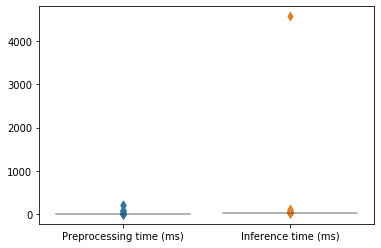

In [43]:
ax = sns.boxenplot(data=df)